In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [98]:
# df = pd.read_pickle("ontology_vectors.pickle")
# # df = pd.read_csv("SIDER_PTs.csv")
# # df_1 = pd.DataFrame(df)
# # print(df)
# keysList = list(df.keys())
# print(keysList)
# print(df.get('ontology_vectors').shape)
# print(len(df.get('exist_names')))
# print(len(df.get('adr_ids')))
# print(df.get('adr_ids'))

In [ ]:
data=pd.read_csv('ADR_ontology.csv',  encoding='unicode_escape')
# print(data)

In [ ]:
print(list(data.columns.values))

In [ ]:
data[['ADRECS_ID1','ADRECS_ID2', 'ADRECS_ID3', 'ADRECS_ID4']] = data['ADRECS_ID'].str.split('.',expand=True)
# print(data[['ADRECS_ID1','ADRECS_ID2', 'ADRECS_ID3', 'ADRECS_ID4']])


## Read ADR_ontology and group the side effects and save as a coarse dataset

In [ ]:
# repeat the value of row x of column a1 in row y of column a1, based on the condition that row x and row y of column a2 are equal
# So here we're keeping the ADR TERM only until tree 2 of 4 tree hiararchy
for index, row in data.iterrows():
    if index > 0 and row['ADRECS_ID1'] == data.at[index - 1, 'ADRECS_ID1']:
           
#     if index > 0 and row['ADRECS_ID1'] == data.at[index - 1, 'ADRECS_ID1'] \
#     and row['ADRECS_ID2'] == data.at[index - 1, 'ADRECS_ID2']:
        
        data.at[index, 'ADR_TERM'] = data.at[index - 1, 'ADR_TERM']
# print(data[['ADR_TERM']][:50])

In [ ]:
data.drop(['ADRECS_ID1','ADRECS_ID2', 'ADRECS_ID3', 'ADRECS_ID4'], axis=1, inplace=True)
data.to_csv('ADR_ontology_coarse_v2.tsv', sep='\t')

## Now assign every side effect from the Sider database to a ADReCS side-effect group

In [180]:
data_group=pd.read_csv('ADR_ontology_coarse_v3.csv',  encoding='unicode_escape')
print(list(data_group.columns.values))

['Unnamed: 0', 'ADRECS_ID', 'ADR_ID', 'ADR_TERM', 'ADR_SYNONYMS', 'MEDDRA_CODE']


In [181]:
# data_se=pd.read_csv('meddra_all_se.tsv', sep='\t', encoding='unicode_escape', names=['STITCH_FLAT', 'STITCH_STEREO', 'UMLS_id1', 'MedDRA_type', 'UMLS_id2', 'ADR_name'])
data_se=pd.read_csv('meddra_all_se_v1.csv', encoding='unicode_escape', names=['STITCH_FLAT', 'STITCH_STEREO', 'UMLS_id1', 'MedDRA_type', 'UMLS_id2', 'ADR_name'])
print(data_se)
# adr_names = label_df.columns.values

         STITCH_FLAT STITCH_STEREO  UMLS_id1 MedDRA_type  UMLS_id2  \
0       CID100000085  CID000010917  C0000729         LLT  C0000729   
1       CID100000085  CID000010917  C0000729          PT  C0000737   
2       CID100000085  CID000010917  C0000737         LLT  C0000737   
3       CID100000085  CID000010917  C0000737          PT  C0687713   
4       CID100000085  CID000010917  C0000737          PT  C0000737   
...              ...           ...       ...         ...       ...   
309844  CID171306834  CID071306834  C3203358          PT  C1145670   
309845  CID171306834  CID071306834  C3665386         LLT  C3665386   
309846  CID171306834  CID071306834  C3665386          PT  C3665347   
309847  CID171306834  CID071306834  C3665596         LLT  C3665596   
309848  CID171306834  CID071306834  C3665596          PT  C0347390   

                     ADR_name  
0            Abdominal cramps  
1              Abdominal pain  
2              Abdominal pain  
3       Gastrointestinal pain  

In [182]:
adr_query = data_se.get('ADR_name')
print(adr_query)
print(len(set(adr_query)))

0              Abdominal cramps
1                Abdominal pain
2                Abdominal pain
3         Gastrointestinal pain
4                Abdominal pain
                  ...          
309844      Respiratory failure
309845          Abnormal vision
309846        Visual impairment
309847                    Warts
309848           Skin papilloma
Name: ADR_name, Length: 309849, dtype: object
6123


In [183]:
# A list containing SE group names
group_list= data_group['ADR_TERM'].unique().tolist()
print(group_list)

['Blood and lymphatic system disorders', 'Cardiac disorders', 'Congenital, familial and genetic disorders', 'Ear and labyrinth disorders', 'Endocrine disorders', 'Eye disorders', 'Gastrointestinal disorders', 'General disorders and administration site conditions', 'Hepatobiliary disorders', 'Immune system disorders', 'Infections and infestations', 'Injury, poisoning and procedural complications', 'Investigations', 'Metabolism and nutrition disorders', 'Musculoskeletal and connective tissue disorders', 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'Nervous system disorders', 'Pregnancy, puerperium and perinatal conditions', 'Psychiatric disorders', 'Renal and urinary disorders', 'Reproductive system and breast disorders', 'Respiratory, thoracic and mediastinal disorders', 'Skin and subcutaneous tissue disorders', 'Vascular disorders', 'Surgical and medical procedures', 'Social circumstances', 'Product issues']


In [11]:
'''
Search for the ADR terms obtained from SIDER to ADReCS database 
and assign to the  27 ADR groups as described in the database and define as vectors.
'''
import numpy as np
ont_vec = []
count = 0
for adr_name in adr_query:
    count += 1
    try:
        adr_vec =  np.zeros(len(group_list))
        result = data_group[data_group['ADR_SYNONYMS'].str.contains(adr_name)]
    #     print(result.shape)
    #     print(adr_name,':', result['ADR_TERM'].to_string(index=False))
        for index, row in result.iterrows():
    #         print(adr_name,':', row['ADR_TERM'])
            index = group_list.index(row['ADR_TERM'])
            adr_vec[index] = 1
        ont_vec.append(adr_vec)
    except:
        print("An exception occurred")
        print("count: ", count, " ADR: ", adr_name)

# Converting the ont_vec (list of arrays) to no.array
numpy_array = np.vstack(ont_vec)


/var/folders/6n/3nqlb7m93wg2vxy4dg00ggzh0000gn/T/ipykernel_2368/3198524289.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  result = data_group[data_group['ADR_SYNONYMS'].str.contains(adr_name)]


In [18]:
# df = pd.DataFrame(numpy_array, index = adr_query, columns = group_list )
df = pd.DataFrame(numpy_array, columns = group_list )
print(df)
df.drop(['Investigations','Social circumstances', 'Product issues', 'Surgical and medical procedures'], axis=1, inplace=True)

        Blood and lymphatic system disorders  Cardiac disorders  \
0                                        0.0                0.0   
1                                        0.0                0.0   
2                                        0.0                0.0   
3                                        0.0                0.0   
4                                        0.0                0.0   
...                                      ...                ...   
309844                                   0.0                0.0   
309845                                   0.0                0.0   
309846                                   0.0                0.0   
309847                                   0.0                0.0   
309848                                   0.0                0.0   

        Congenital, familial and genetic disorders  \
0                                              0.0   
1                                              0.0   
2                                

In [19]:
df.insert(0,'STITCH_FLAT', data_se['STITCH_FLAT'])
df.insert(1,'STITCH_STEREO', data_se['STITCH_STEREO'])
df.insert(2,'ADR_name', data_se['ADR_name'])
print(df)
df.to_csv('SIDER_processed_v1.tsv', sep='\t')

         STITCH_FLAT STITCH_STEREO               ADR_name  \
0       CID100000085  CID000010917       Abdominal cramps   
1       CID100000085  CID000010917         Abdominal pain   
2       CID100000085  CID000010917         Abdominal pain   
3       CID100000085  CID000010917  Gastrointestinal pain   
4       CID100000085  CID000010917         Abdominal pain   
...              ...           ...                    ...   
309844  CID171306834  CID071306834    Respiratory failure   
309845  CID171306834  CID071306834        Abnormal vision   
309846  CID171306834  CID071306834      Visual impairment   
309847  CID171306834  CID071306834                  Warts   
309848  CID171306834  CID071306834         Skin papilloma   

        Blood and lymphatic system disorders  Cardiac disorders  \
0                                        0.0                0.0   
1                                        0.0                0.0   
2                                        0.0                0.0   

In [25]:
#--- Creating SE dataset with single entries for all drugs--#

import pandas as pd
import numpy as np
df_sider = pd.read_csv('SIDER_processed_v1.tsv', sep='\t')
column_names_list = df_sider.columns.tolist()
# print(column_names_list)
result_sum = df_sider.groupby('STITCH_STEREO').sum().reset_index() # sum side effect vectors correspond to a specific drug
# print(df_sider)
# print(result_sum)
y = result_sum.iloc[:, 2:25].values # extract columns of SEs
print(y[-5:])
binary_df = (y != 0).astype(int) # convert to binary matrix
print(binary_df[-5:])
print(binary_df.shape)

result_binary = pd.DataFrame(binary_df, columns=column_names_list[4:])
column_sums = result_binary.sum()
print(f'number of entries for each SE: {column_sums}')
result_binary.insert(0,'STITCH', result_sum['STITCH_STEREO'])
# print(result_binary)

# checking for rows with all zeros
y_t = result_binary.iloc[:, 1:].values
c = 0
for i in range(y_t.shape[0]):
    if np.all(y_t[i] == 0):
        c += 1
        print(i)
print(c)
result_binary.to_csv('SIDER_processed_unique_drug_entry.tsv', sep='\t')

[[ 19.  27.   7.   7.  11.  21.  76.  30.  10.  25.  21.  36.  27.  28.
   10.  44.  11.  18.  17.  12.  23.  24.  60.]
 [  2.  10.   4.   2.  16.   4.  23.  17.   4.  10.  10.  20.  22.  17.
    2.  21.  14.  12.   2.   2.  10.   6.  16.]
 [  7.  10.   2.   2.   2.  61.  16.  12.   0.  23.  15.  19.   2.  13.
    0.  29.   6.  10.   2.   0.  24.  28.  27.]
 [ 86.  93.  55.  36.  52. 133. 183. 137.  51. 153. 161. 136.  93. 129.
   36. 245.  84. 133.  82.  84. 158. 158. 205.]
 [  0.   8.   0.   0.   1.   0.  14.   3.   0.   1.   3.  12.   1.   2.
    0.  11.  10.   4.   0.   1.   1.   5.  12.]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1]]
(1556, 23)
number of entries for each SE: Blood and lymphatic system disorders                                   1435
Cardiac disorders                  

So we have a greatly imbalanced dataset

## Retrieve SMILES from PubChem using STITCH ID

In [40]:
# Get the unique list of STITCH Ids
print(len(data_se['STITCH_STEREO']))
unique_id = list(set(data_se['STITCH_STEREO']))
print(len(unique_id))
print(unique_id)

309849
1556
['CID000157921', 'CID005362070', 'CID000016078', 'CID006918584', 'CID000003105', 'CID003034756', 'CID000006018', 'CID000004497', 'CID000008549', 'CID002761171', 'CID016136912', 'CID000002972', 'CID000004896', 'CID000002754', 'CID000708857', 'CID027885548', 'CID000037542', 'CID000123600', 'CID005742832', 'CID000005768', 'CID005388961', 'CID000038852', 'CID000064778', 'CID000004032', 'CID005281107', 'CID000219090', 'CID000026757', 'CID000041744', 'CID000003151', 'CID000060834', 'CID003010818', 'CID006321411', 'CID000006468', 'CID005284583', 'CID000002156', 'CID000002578', 'CID000003372', 'CID000001978', 'CID000061475', 'CID000023993', 'CID000055466', 'CID000002727', 'CID000005524', 'CID024873435', 'CID000004139', 'CID003081884', 'CID003005572', 'CID000002803', 'CID000004235', 'CID000059768', 'CID000000774', 'CID000153994', 'CID000027661', 'CID000005430', 'CID000005311', 'CID000021844', 'CID000039468', 'CID000005184', 'CID000006196', 'CID000119182', 'CID006918638', 'CID0000609

In [101]:
# print(list(set([3,4,1,2,3,2,1,1])))

In [169]:
## Just a testing on how two CIDs correspond to same molecules with different stereochemistry
stitch_id = ['CID000000143', 'CID000006006']
for i in stitch_id:
    cid = i.lstrip('CID0')
    print(cid)
    compound = pcp.Compound.from_cid(cid)
    if 'canonical_smiles' in compound.to_dict():
        print(compound.to_dict()['canonical_smiles'])
        print(compound.to_dict()['isomeric_smiles'])
        ms = Chem.MolFromSmiles(compound.to_dict()['isomeric_smiles'])
        extended = Chem.MolToCXSmiles(ms, isomericSmiles=True )
        print(extended)
#         img = Chem.Draw.MolToImage(ms)
# print(smile_list[39])
#         img.show()

143
C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)NC(CCC(=O)O)C(=O)O
C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)NC(CCC(=O)O)C(=O)O
Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc1)N2C=O
6006
C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)NC(CCC(=O)O)C(=O)O
C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O
Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc1)N2C=O


In [170]:
import pubchempy as pcp

def stitch_to_smiles(stitch_id):
    # Convert Stereo STITCH ID to PubChem CID
    cid = stitch_id.lstrip('CID0')
    
    if cid is None:
        print("No compound found for the given STITCH ID.")
        return None
    
    # Retrieve compound information including SMILES
    compound = pcp.Compound.from_cid(cid)
    
#     if 'canonical_smiles' in compound.to_dict():
#         return compound.to_dict()['canonical_smiles']
    if 'isomeric_smiles' in compound.to_dict():
        return compound.to_dict()['isomeric_smiles']
    else:
        print("No SMILES found for the given compound.")
        return None

# Run through STITCH IDs (stereos)
smile_list = []
for i in unique_id:
    smiles = stitch_to_smiles(i)
    if smiles:
            smile_list.append(smiles)
    else:
        print("SMILES for STITCH ID {} not found.".format(stitch_id))

dict = {'STITCH': unique_id, 'SMILES': smile_list} 
    
df = pd.DataFrame(dict)
    
# df.to_csv('STITCH_SMILES.tsv', sep='\t')
df.to_csv('STITCH_isoSMILES.tsv', sep='\t') # We will use this as SIDER has same drug under multiple CIDs differ by stereochemistry only


Read the STITCH_SMILES data and remove salts from it:

In [113]:
## -- We don't need this now --##

# from rdkit.Chem.SaltRemover import SaltRemover
# data = pd.read_csv('STITCH_SMILES.tsv', sep='\t')
# remover = SaltRemover(defnData="[Cl,Br,F,Na,Y,Gd,Li,OH,Fe,K,Mg,Cr,La,Pt,Sm,Tl,Zn,Se,Ra,Ag,As]" ) # use default saltremover
# salt_stripped = []
# for idx, name  in enumerate(data['SMILES']):
#     mol = Chem.MolFromSmiles( name )
#     stripped = remover.StripMol( mol ) # strip salts
#     salt_stripped.append(Chem.MolToSmiles( stripped ))
# data['salt_stripped'] = salt_stripped
# data
# data.to_csv('STITCH_SMILES_woSALT.tsv', sep='\t')

[02:52:56] WARNING: not removing hydrogen atom without neighbors
[02:52:56] WARNING: not removing hydrogen atom without neighbors


Processing smile string according to deepSide paper:

In [172]:
##-- Here we read all the smiles and convert it to extended smile representation--
## using RdKit. Then we only filter those smiles with length 45-400 similar to DeepSide paper.

from rdkit import Chem

extended_smiles = []
updated_stitch = []
# data = pd.read_csv('STITCH_SMILES.tsv', sep='\t')
data = pd.read_csv('STITCH_isoSMILES.tsv', sep='\t')
for idx, name  in enumerate(data['SMILES']):
    mol = Chem.MolFromSmiles( name )
#     x_smiles = Chem.MolToCXSmiles( mol ) # for canonial smiles
    x_smiles = Chem.MolToCXSmiles(mol, isomericSmiles=True) # for isomeric smiles
    if len(x_smiles) > 45 and len(x_smiles) < 400:
        extended_smiles.append(Chem.MolToCXSmiles( mol ))
        updated_stitch.append(data['STITCH'][idx])
print(len(extended_smiles), len(updated_stitch))
dict = {'STITCH': updated_stitch, 'SMILES': extended_smiles} 
    
df = pd.DataFrame(dict)
    
# df.to_csv('STITCH_extendedSMILES.tsv', sep='\t')
df.to_csv('STITCH_extended_isoSMILES.tsv', sep='\t')
    


[19:38:41] WARNING: not removing hydrogen atom without neighbors
[19:38:41] WARNING: not removing hydrogen atom without neighbors


825 825


In [171]:
# data = pd.read_csv('STITCH_SMILES.tsv', sep='\t')
# print(len(data['SMILES']))
# print(len(set(data['SMILES'])))

Have to add the smiles in the SIDER dataset...

In [2]:
'''
Search for the STITCH IDs common between filtered smiles dataset 
and processed sider dataset.
'''

# df_sider = pd.read_csv('SIDER_processed_v1.tsv', sep='\t')
df_sider = pd.read_csv('SIDER_processed_unique_drug_entry.tsv', sep='\t') 
# df_smiles = pd.read_csv('STITCH_extendedSMILES.tsv', sep='\t')
df_smiles = pd.read_csv('STITCH_extended_isoSMILES.tsv', sep='\t')

# print(df_smiles)
# print(df_sider)
# filtered_df_sider = df_sider[df_sider['STITCH_STEREO'].isin(df_smiles['STITCH'])]
filtered_df_sider = df_sider[df_sider['STITCH'].isin(df_smiles['STITCH'])]
filtered_df_sider

smiles_matching_stitch = []
for stitch in filtered_df_sider['STITCH']:
    result = df_smiles[df_smiles['STITCH'].str.contains(stitch)]
    sm = str(result['SMILES']).split()[1]
    smiles_matching_stitch.append(sm)
# print(smiles_matching_stitch)

# filtered_df_sider.drop(['STITCH_FLAT','ADR_name'], axis=1, inplace=True)
filtered_df_sider.drop(['Unnamed: 0'], axis=1, inplace=True)
# print(len(smiles_matching_stitch))
filtered_df_sider.insert(1, 'SMILES', smiles_matching_stitch)
# filtered_df_sider
# #     print(result)

# filtered_df_sider.to_csv('SIDER_withSMILES.tsv', sep='\t')
filtered_df_sider.to_csv('SIDER_with_isoSMILES.tsv', sep='\t')


/Users/souviksinha/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
'''
One-hot-encoding example with pd
'''
# import pandas as pd

# # Example DataFrame with a categorical column
# data = {'color': ['red', 'blue', 'green', 'green', 'red']}
# df = pd.DataFrame(data)

# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(df['color'])

# # Concatenate the one-hot encoded columns with the original DataFrame
# df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# print(df_encoded)


'\nOne-hot-encoding example with pd\n'

## Get fingerprints and descriptors correspond to each SMILE

In [46]:
from rdkit import Chem

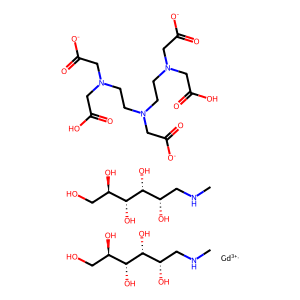

In [179]:
# ms = Chem.MolFromSmiles(smile_list[39])
ms = Chem.MolFromSmiles('CNC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO.CNC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO.O=C([O-])CN(CCN(CC(=O)[O-])CC(=O)O)CCN(CC(=O)[O-])CC(=O)O.[Gd+3] |^1:53|')
img = Chem.Draw.MolToImage(ms)
# print(smile_list[39])
img

In [66]:
# from rdkit.Chem import rdMolDescriptors
# print(get_morgan(ms))
# print(get_maccs(ms))

create molecular fingerprints

In [175]:
import create_fingerprints as cf
df_smiles = pd.read_csv('STITCH_extended_isoSMILES.tsv', sep='\t')
df_mols = pd.DataFrame([Chem.MolFromSmiles(df_smiles['SMILES'][x]) for x in range(len(df_smiles['SMILES']))], columns=["mols"])
df_mols

[19:44:46] WARNING: not removing hydrogen atom without neighbors
[19:44:46] WARNING: not removing hydrogen atom without neighbors


mols
0    <rdkit.Chem.rdchem.Mol object at 0x7fb3912db510>
1    <rdkit.Chem.rdchem.Mol object at 0x7fb3912db5f0>
2    <rdkit.Chem.rdchem.Mol object at 0x7fb3912db580>
3    <rdkit.Chem.rdchem.Mol object at 0x7fb3912db660>
4    <rdkit.Chem.rdchem.Mol object at 0x7fb3912db6d0>
..                                                ...
820  <rdkit.Chem.rdchem.Mol object at 0x7fb3912f2200>
821  <rdkit.Chem.rdchem.Mol object at 0x7fb3912f2270>
822  <rdkit.Chem.rdchem.Mol object at 0x7fb3912f22e0>
823  <rdkit.Chem.rdchem.Mol object at 0x7fb3912f2350>
824  <rdkit.Chem.rdchem.Mol object at 0x7fb3912f23c0>

[825 rows x 1 columns]

In [176]:
df_ecfp4 = cf.create_ecfp4_fingerprint(df_mols, write=True)
df_ecfp4.insert(0,'STITCH_STEREO', data_se['STITCH_STEREO'])
df_ecfp4.to_csv('STITCH_extISO_ECFP4.tsv', sep='\t')

In [177]:
df_maccs =cf.create_maccs_fingerprint(df_mols, write=True)
df_maccs.insert(0,'STITCH_STEREO', data_se['STITCH_STEREO'])
df_maccs.to_csv('STITCH_extISO_MACCS.tsv', sep='\t')

create molecular descriptors

In [178]:
import create_descriptors as cd1
df_des = cd1.calc_descriptors(df_mols, write=True)
df_des.insert(0,'STITCH_STEREO', data_se['STITCH_STEREO'])
df_des.to_csv('STITCH_extISO_Descriptor.tsv', sep='\t')